<a href="https://colab.research.google.com/github/baoga1124/Project-intro/blob/master/CenterTrack-Tracking-Objects-as-Points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CenterTrack - Tracking Objects as Points
Simultaneous object detection and tracking using center points:
<img src="https://github.com/xingyizhou/CenterTrack/raw/master/readme/fig2.png">

**Original code :** [CenterTrack](https://github.com/xingyizhou/CenterTrack) by [Xingyi Zhou](https://github.com/xingyizhou)

**[Tracking Objects as Points](http://arxiv.org/abs/2004.01177)**,

Xingyi Zhou, Vladlen Koltun, Philipp Krähenbühl,

*arXiv technical report [(arXiv 2004.01177)](http://arxiv.org/abs/2004.01177)*

**Citation**
```
@article{zhou2020tracking,
  title={Tracking Objects as Points},
  author={Zhou, Xingyi and Koltun, Vladlen and Kr{\"a}henb{\"u}hl, Philipp},
  journal={ECCV},
  year={2020}
}
```

In [1]:
! nvidia-smi
!/usr/local/cuda/bin/nvcc --version

Wed Feb 15 18:07:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    27W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Installation
1. Install PyTorch:

In [2]:
import torch
print(torch.__version__)

1.13.1+cu116


In [3]:
! pip install torch==1.4.0 torchvision==0.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.4/753.4 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 72.7 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1+cu116
    Uninstalling torch-1.13.1+cu116:
      Successfully uninstalled torch-1.13.1+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1+cu116
    Uninstalling torchvision-0.14.1+cu116:
      Successfully uninstalled torchvision-0.14.1+cu116
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.14.1 requires torch==1.13.1, but you have torch 1.4.0 which is incompatible.
torchaudio 0.13.1+cu116 requires torch==1.13.1, but you have torch 1.4.0 which is incompatible.
fastai 2.7.10 requi

2. Install [COCOAPI](https://github.com/cocodataset/cocoapi):

In [4]:
! pip install cython; pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-7e8p9jii
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-7e8p9jii
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp38-cp38-linux_x86_64.whl size=421018 sha256=7ac7a6fc0361e181a0f77de5642cef8fca6ee14947f76ded74c544e7151e0d43
  Stored in directory: /tmp/pip-ephem-wheel-cache-xnawiz2c/wheels/56/da/49/cb71a7c450b59588934077f431100c05fbde50646ee84a8d40
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.6
    Uninstalling pycocotools-2.0.

3. Clone this repo:

In [5]:
CenterTrack_ROOT="CenterTrack"
! git clone --recursive https://github.com/xingyizhou/CenterTrack $CenterTrack_ROOT
%cd CenterTrack

Cloning into 'CenterTrack'...
remote: Enumerating objects: 290, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 290 (delta 0), reused 3 (delta 0), pack-reused 285
Receiving objects: 100% (290/290), 15.01 MiB | 17.08 MiB/s, done.
Resolving deltas: 100% (109/109), done.
/content/CenterTrack


You can manually install the [submodules](https://github.com/xingyizhou/CenterTrack/blob/master/.gitmodules) if you forget --recursive.

4. Install the requirements

In [6]:
! pip install -r requirements.txt
! apt-get install libx264-dev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.9/312.9 KB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.5/161.5 KB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 83.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 93.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 86.5 MB/s eta 0:00:00
  Created wheel for progress: filename=pro

In [7]:
%ls src/lib/model/networks/

backbones/     dla.py    generic_network.py  resdcn.py
base_model.py  dlav0.py  necks/              resnet.py


In [8]:
#%rm -r src/lib/model/networks/DCNv2

rm: cannot remove 'src/lib/model/networks/DCNv2': No such file or directory


5. Compile deformable convolutional (from DCNv2).

In [9]:
# clone if it is not automatically downloaded by `--recursive`.
%%shell

cd src/lib/model/networks/
git clone https://github.com/CharlesShang/DCNv2/  
cd DCNv2/
./make.sh

Cloning into 'DCNv2'...
remote: Enumerating objects: 214, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 214 (delta 64), reused 49 (delta 49), pack-reused 137
Receiving objects: 100% (214/214), 1.40 MiB | 36.86 MiB/s, done.
Resolving deltas: 100% (133/133), done.
running build
running build_ext
building '_ext' extension
creating build
creating build/temp.linux-x86_64-3.8
creating build/temp.linux-x86_64-3.8/content
creating build/temp.linux-x86_64-3.8/content/CenterTrack
creating build/temp.linux-x86_64-3.8/content/CenterTrack/src
creating build/temp.linux-x86_64-3.8/content/CenterTrack/src/lib
creating build/temp.linux-x86_64-3.8/content/CenterTrack/src/lib/model
creating build/temp.linux-x86_64-3.8/content/CenterTrack/src/lib/model/networks
creating build/temp.linux-x86_64-3.8/content/CenterTrack/src/lib/model/networks/DCNv2
creating build/temp.linux-x86_64-3.8/content/CenterTrack/src/lib/model/networks/DCNv2/src
cre

6. Download pertained models for [monocular 3D tracking](https://drive.google.com/open?id=1e8zR1m1QMJne-Tjp-2iY_o81hn2CiQRt), [80-category tracking](https://drive.google.com/open?id=1tJCEJmdtYIh8VuN8CClGNws3YO7QGd40), or [pose tracking](https://drive.google.com/open?id=1tJCEJmdtYIh8VuN8CClGNws3YO7QGd40) and move them to 
`$CenterTrack_ROOT/models/`. 

  More models can be found in [Model zoo](https://github.com/xingyizhou/CenterTrack/blob/master/readme/MODEL_ZOO.md).

In [11]:

! gdown --id 1gPQFzqneDtT_PjJRRuyskRsNTRHXovw1 -O models/nuScenes_3Dtracking.pth

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1gPQFzqneDtT_PjJRRuyskRsNTRHXovw1
To: /content/CenterTrack/models/nuScenes_3Dtracking.pth
100% 81.8M/81.8M [00:00<00:00, 90.5MB/s]


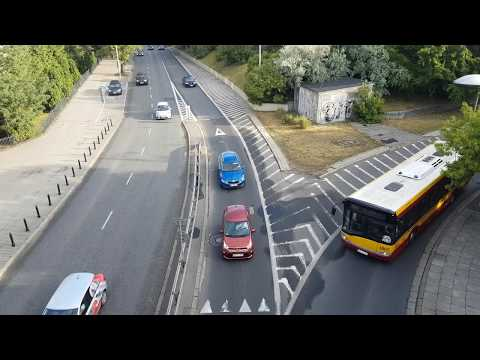

In [12]:
#!pip install youtube-dl
from IPython.display import YouTubeVideo

YOUTUBE_ID = 'MNn9qKG2UFI'   # car
#YOUTUBE_ID = 'MNn9qKG2UFI'   
#YOUTUBE_ID = '2bKXv_XviFc'    # pedestrian 

YouTubeVideo(YOUTUBE_ID)

In [ ]:
#! rm -rf youtube.mp4
# download the youtube with the given ID
! youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube2.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the first 5 seconds
#! ffmpeg -y -loglevel info -i youtube2.mp4 -t 20 pedestrian.avi
! ffmpeg -y -loglevel info -i youtube.mp4 -t 20 road_traffic.mp4

## Use CenterTrack

In [13]:
%cd src/

/content/CenterTrack/src


**Note:**
1. replace "cv2.imshow" in function show_all_image in "debugger.py(/src/lib/utils/)" with "pass"
2. comment out  "cv2.imshow" at line 80 in "demo.py".

Video clip from the [nuScenes dataset](https://www.nuscenes.org/?externalData=all&mapData=all&modalities=Any) in `videos/nuscenes_mini.mp4`. To test monocular 3D tracking on this video, run

In [26]:
!python demo.py tracking,ddd --load_model ../models/nuScenes_3Dtracking.pth --dataset nuscenes --pre_hm --track_thresh 0.1 --demo /content/drive/MyDrive/4K.mp4 --test_focal_length 1519 --video_h 1080 --video_w 1920 --save_video 

Streaming output truncated to the last 5000 lines.
frame 4185 |tot 0.067s |load 0.000s |pre 0.021s |net 0.042s |dec 0.002s |post 0.002s |merge 0.000s |display 0.008s |
frame 4186 |tot 0.066s |load 0.000s |pre 0.019s |net 0.042s |dec 0.002s |post 0.003s |merge 0.000s |display 0.010s |
frame 4187 |tot 0.067s |load 0.000s |pre 0.020s |net 0.042s |dec 0.002s |post 0.002s |merge 0.000s |display 0.008s |
frame 4188 |tot 0.066s |load 0.000s |pre 0.020s |net 0.041s |dec 0.002s |post 0.003s |merge 0.000s |display 0.009s |
frame 4189 |tot 0.071s |load 0.000s |pre 0.026s |net 0.041s |dec 0.002s |post 0.002s |merge 0.000s |display 0.009s |
frame 4190 |tot 0.067s |load 0.000s |pre 0.022s |net 0.041s |dec 0.002s |post 0.002s |merge 0.000s |display 0.008s |
frame 4191 |tot 0.065s |load 0.000s |pre 0.019s |net 0.042s |dec 0.002s |post 0.003s |merge 0.000s |display 0.008s |
frame 4192 |tot 0.065s |load 0.000s |pre 0.019s |net 0.041s |dec 0.002s |post 0.002s |merge 0.000s |display 0.009s |
frame 4193 |t

In [28]:
!cp /content/CenterTrack/results/default_4K.mp4.mp4 /content/drive/MyDrive

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Similarly, for 80-category tracking on images/ video, run:

In [ ]:
! python demo.py tracking --load_model ../models/coco_tracking.pth --demo road_traffic.mp4

If you want to test with person tracking models, you need to add --num_class 1:

In [ ]:
! python demo.py tracking --load_model ../models/mot17_half.pth --num_class 1 --demo pedestrian.avi --save_video
#! python demo.py tracking --load_model ../models/mot17_fulltrain.pth --num_class 1 --demo pedestrian.avi --save_video --debug 2

You can add --debug 2 to visualize the heatmap and offset predictions.

In [ ]:
! python demo.py tracking --load_model ../models/mot17_half.pth --num_class 1 --debug 2 --demo video.mp4

For monocular 3D tracking, run

In [ ]:
! python demo.py tracking,ddd --demo ../road_traffic.mp4 --load_model ../models/coco_tracking.pth --save_video

Similarly, for pose tracking, run:

In [ ]:
! python demo.py tracking,multi_pose --load_model ../models/coco_pose.pth --demo video.mp4

## Training on custom dataset
If you want to train CenterTrack on your own dataset, you can use `--dataset custom` and manually specify the annotation file, image path, input resolutions, and number of categories. You still need to create the annotation files in COCO format (referring to the many `convert_X_to_coco.py` examples in tools). For example, you can use the following command to train on our [mot17 experiment](https://github.com/xingyizhou/CenterTrack/blob/master/experiments/mot17_half_sc.sh) without using the pre-defined mot dataset file:

In [ ]:
! python main.py tracking --exp_id mot17_half_sc --dataset custom --custom_dataset_ann_path ../data/mot17/annotations/train_half.json --custom_dataset_img_path ../data/mot17/train/ --input_h 544 --input_w 960 --num_classes 1 --pre_hm --ltrb_amodal --same_aug --hm_disturb 0.05 --lost_disturb 0.4 --fp_disturb 0.1 --gpus 0

## Benchmark Evaluation and Training
After installation, follow the instructions in [DATA.md](https://github.com/xingyizhou/CenterTrack/blob/master/readme/DATA.md) to setup the datasets. Then check [GETTING_STARTED.md](https://github.com/xingyizhou/CenterTrack/blob/master/readme/GETTING_STARTED.md) to reproduce the results in the paper. We provide scripts for all the experiments in the [experiments folder](https://github.com/xingyizhou/CenterTrack/blob/master/experiments).

### **Benchmark evaluation**
First, download the models you want to evaluate from our model zoo and put them in CenterTrack_ROOT/models/.

**MOT17**

To test the tracking performance on MOT17 with our pretrained model, run

In [ ]:
! python test.py tracking --exp_id mot17_half --dataset mot --dataset_version 17halfval --pre_hm --ltrb_amodal --track_thresh 0.4 --pre_thresh 0.5 --load_model ../models/mot17_half.pth

This will give a MOTA of `66.1` if set up correctly. `--pre_hm` is to enable the input heatmap. `--ltrb_amodal` is to use the left, top, right, bottom bounding box representation to enable detecting out-of-image bounding box (We observed this is important for MOT datasets). And `--track_thresh` and `--pre_thresh` are the score threshold for predicting a bounding box ($\theta$ in the paper) and feeding the heatmap to the next frame ($\tau$ in the paper), respectively.

To test with public detection, run

In [ ]:
! python test.py tracking --exp_id mot17_half_public --dataset mot --dataset_version 17halfval --pre_hm --ltrb_amodal --track_thresh 0.4 --pre_thresh 0.5 --load_model ../models/mot17_half.pth --public_det --load_results ../data/mot17/results/val_half_det.json

The expected MOTA is `63.1`.

To test on the test set, run

### Training
We have packed all the training scripts in the [experiments folder](https://github.com/xingyizhou/CenterTrack/blob/master/experiments). The experiment names correspond to the model name in the [model zoo](https://github.com/xingyizhou/CenterTrack/blob/master/experiments). The number of GPUs for each experiment can be found in the scripts and the model zoo. If the training is terminated before finishing, you can use the same command with `--resume` to resume training. It will found the latest model with the same `exp_id`. Some experiments rely on pretraining on another model. In this case, download the pretrained model from our model zoo or train that model first.